In [486]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
import pandas as pd

tfd = tfp.distributions


In [6]:
from collections import Counter

## 6/27/20

In [ ]:
np.

In [749]:
np.random.randn(5)/  np.random.randn(5, 4, 3)

ValueError: operands could not be broadcast together with shapes (5,) (5,4,3) 

In [755]:
np.broadcast_to(np.random.randn(5,1), (5,3))

array([[-0.69476992, -0.69476992, -0.69476992],
       [-0.02574157, -0.02574157, -0.02574157],
       [ 1.56293232,  1.56293232,  1.56293232],
       [-2.0410665 , -2.0410665 , -2.0410665 ],
       [ 1.04536371,  1.04536371,  1.04536371]])

### Prob of stale parameters

#### Recursively use random sampling to generate probabilities then diverge more and more

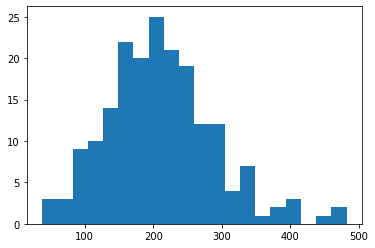

In [406]:
np.random.seed(4)

new_prob = [1/190]*190
for i in range(30): 
    a = np.random.choice(190, 40000, p=new_prob)
    cnt = Counter(a)
    prob_dict = {key: val/40000 for key, val in cnt.items() }
    xs = np.arange(190)
    new_prob = [prob_dict[i] for i in xs]

plt.hist(cnt.values(), bins=20);

In [407]:
a

array([145, 126, 174, ...,  58,  19, 109])

In [95]:
np.isin(np.array([3,4]), np.array([[1,2,3]]))

array([ True, False])

In [ ]:
a_batch = a.reshape((-1, batch_size))

#### Realized I can just load this in and split this

In [410]:
np.random.seed(4)

gid_large = np.load('../data/femnist/large/gid_train.npy', )
gid_small = np.load('../data/femnist/small/gid_train.npy', )

gid_large = np.random.permutation(gid_large).astype()
gid_small = np.random.permutation(gid_small)

In [399]:
len(gid_large), len(gid_small)

(711164, 35535)

In [562]:
a = gid_large
num_unique = len(np.unique(a))

In [675]:
batch_size = 1000

num_unique_batch = []
max_occ = []
mean_occ = []
occ = []
for idx in range(0, len(a), batch_size):
    batch = a[idx:idx+batch_size]
    
    num_unique_batch.append(len(np.unique(batch)))
    max_occ.append(max(list(Counter(batch).values())))
    mean_occ.append(np.mean(list(Counter(batch).values())))
    occ.append(np.isin(np.arange(num_unique), batch))
    
occ = np.array(occ)

853.6839887640449


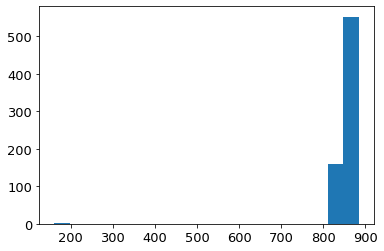

In [676]:
print(np.mean(num_unique_batch))
plt.hist(num_unique_batch, bins=20);

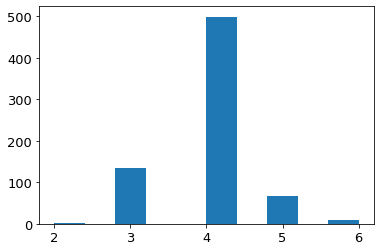

In [677]:
plt.hist(max_occ);

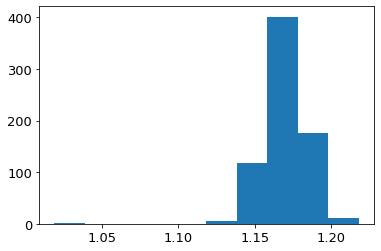

In [678]:
plt.hist(mean_occ);

For batch size = 200, avg of 120 unique groups, with avg size 1.65

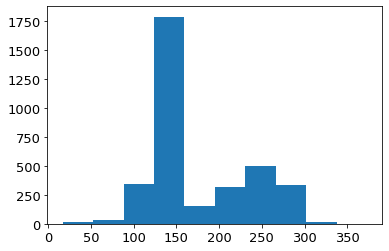

In [679]:
plt.hist(np.sum(occ, axis=0));

average of 120 appearances with a low tail of 40

In [680]:
occ

array([[False,  True, False, ..., False, False, False],
       [ True,  True,  True, ...,  True, False,  True],
       [False,  True, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [681]:
def time_since_last(arr):
    miss_mask = (arr == 0)
    tsl_arr  = np.zeros((arr.shape[0], arr.shape[1]))
    for i in range(arr.shape[0]):
        tsl_arr[i,:]  = (1 + tsl_arr[i-1,:])*miss_mask[i,:]
    return tsl_arr

In [682]:
occ_tsl = time_since_last(occ)

In [683]:
np.percentile(occ_tsl, 100, axis=0)

array([10., 11., 13., ..., 22., 19., 22.])

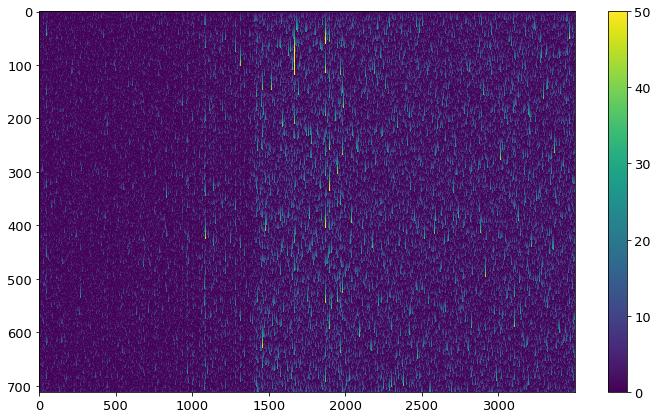

In [684]:
plt.figure(figsize=(12,7))
plt.imshow(np.minimum(occ_tsl, 50), aspect='auto')
plt.colorbar()

<BarContainer object of 190 artists>

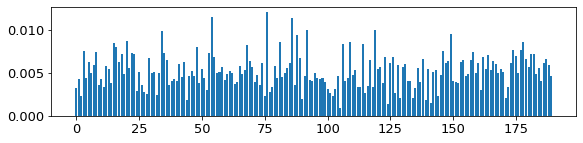

In [685]:
plt.figure(figsize=(9.4,2))
plt.bar(xs, new_prob)

average waiting time?

In [686]:
def get_waiting_times(lst):
    """Cut out strings of ascending tsl to just get final wait time."""
    wait_times = []
    for i, time in enumerate(lst):
        if time == 0:
            wait_times.append(time)
        # last entry
        elif (i+1) == len(lst):
            wait_times.append(time)
        elif lst[i+1] == 0:
            wait_times.append(time)
    return wait_times

In [687]:
for i in range(10):
    print(get_waiting_times(occ_tsl[:10,:10][:,i]))

[1.0, 0.0, 4.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 2.0]
[1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0]
[2.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0]
[4.0, 0.0, 2.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 7.0]
[5.0, 0.0, 0.0, 3.0]
[1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]
[0.0, 5.0, 0.0, 0.0, 1.0, 0.0]


In [688]:
wait_times = []
for i in range(num_unique):
    wait_times.append(get_waiting_times(occ_tsl[:,i]))

(array([274.,  59.,  42.,  23.,  19.,   8.,   8.,   5.,   1.,   2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

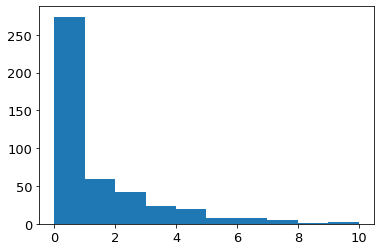

In [689]:
plt.hist(wait_times[0])

In [690]:
occ2d = []

for i in range(50, 100+5, 5):
    percs = []
    for j in range(190):
        perc = np.percentile(wait_times[j], i)
        percs.append(perc)
    # E.g. 
    #print(perc)
    hist, edges = np.histogram(percs, bins=10, range=(0,30))
    #print(hist)
    occ2d.append(hist)
    
occ2d = np.array(occ2d)

Each row says, if we look at the waiting times for each group across 1 epoch, what is the 50 percentile i.e. median waiting time for a group? So this says that 

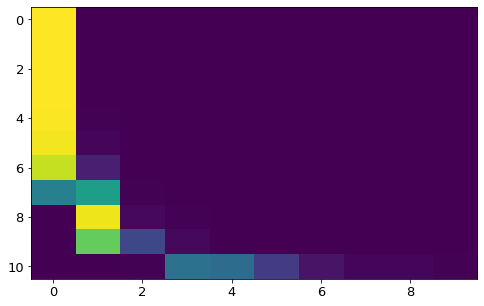

In [691]:
plt.figure(figsize=(8,5))
plt.imshow(occ2d, aspect='auto', cmap='viridis')
#plt.yticks(range(11), range(50, 100+5, 5));

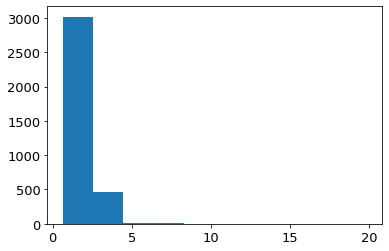

In [692]:
plt.hist([np.mean(np.array(time)) for time in wait_times]);

Relationship between size and prob of inclusion in next batch as modeled by a geometric RV, estimating prob by 1/(1 + avg wait time)

ValueError: x and y must be the same size

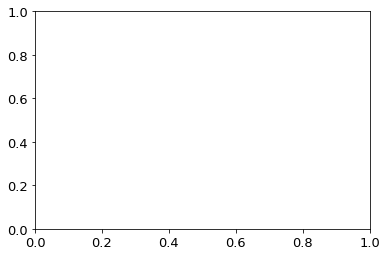

In [693]:
sizes = new_prob
times = [1/(1 + np.mean(np.array(time))) for time in wait_times]
plt.scatter(sizes, times)

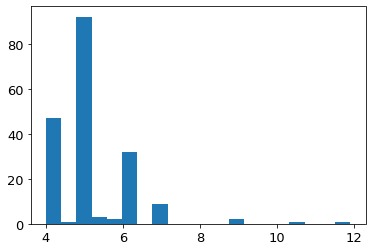

In [697]:
percs=[]
for j in range(190):
    percs.append(np.percentile(wait_times[j], 95))

plt.hist(percs, bins=20);

What percent of updates in a given step will be stale?

In [698]:
batch_tsl = []
for idx in range(0, len(a), batch_size):
    batch = a[idx:idx+batch_size]
    # edge case of first batch
    if idx == 0:
        batch_tsl.append(np.zeros((batch_size,)))
    # edge case of last batch
    elif idx == (len(a)//batch_size)*batch_size:
        batch_tsl.append(
            np.pad(
                batch, 
                pad_width=(0, batch_size-len(batch)), 
                mode='constant'))
    else:
        batch_tsl.append(occ_tsl[int(idx/batch_size)-1, batch])
        
batch_tsl = np.array(batch_tsl)

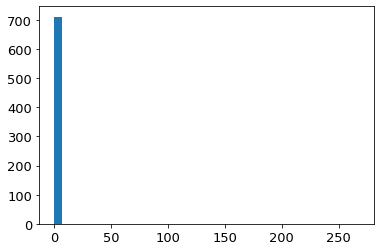

In [699]:
plt.hist(np.mean(batch_tsl, axis=1), bins=40);

In every new batch, the average time since a given example was last in a batch is ___ steps

small, 100 : 3

In [742]:
tsl2d = []

for i in range(25, 100+1, 1):
    percs = np.percentile(batch_tsl, i, axis=1)
    hist, edges = np.histogram(percs, bins=30, range=(0,30))
    #print(hist)
    tsl2d.append(hist)
    
tsl2d = np.array(tsl2d)

Each row says, if we look at the waiting times for each group across 1 epoch, what is the 50 percentile i.e. median waiting time for a group? So this says that 

In [731]:
edges

array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.])

In [702]:
tsl2d[-1]

array([  5,   5,   5,   5,  60, 157, 191, 127,  67,  42,  11,   8,   9,
         3,   3,   4,   1,   1,   1,   1,   3,   0,   1,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

Batch size: 1000
Num groups: 3500
Dataset size: 711164


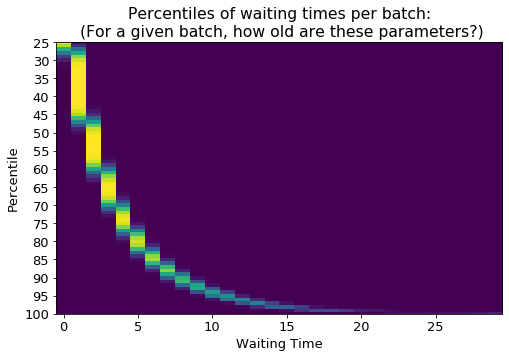

In [748]:
print('Batch size: {}'.format(batch_size))
print('Num groups: {}'.format(num_unique))
print('Dataset size: {}'.format(len(a)))
plt.figure(figsize=(8,5))
plt.imshow(tsl2d, aspect='auto', cmap='viridis')
plt.yticks(range(0,75+2,5), range(25, 100+1, 5));
plt.xticks(range(0,30,5), range(0, 30, 5))
#plt.xlim((0,10-1))
plt.ylabel('Percentile')
plt.xlabel('Waiting Time')
plt.title('Percentiles of waiting times per batch:\n (For a given batch, how old are these parameters?)');

## 3/28

In [12]:
c = np.log(np.expm1(1.))
tf.nn.softplus(c + -8)

<tf.Tensor: id=25, shape=(), dtype=float64, numpy=0.0006368390635397063>

In [3]:
tf.1e-4

0.0001

## 2/28

### KL loss

In [6]:
def compute_kl(mu1, sigma1, mu2, sigma2, gid):
    #print(mu1, gid)
    mu1 = tf.gather(mu1, gid)
    sigma1 = tf.gather(sigma1, gid)
    c = np.log(np.expm1(1.))
    sigma1_plus = tf.nn.softplus(c + sigma1)
    sigma2_plus = tf.nn.softplus(c + sigma2)
    kl = (
        tf.math.log(sigma2_plus/sigma1_plus)
        + (sigma1_plus**2 + (mu1-mu2)**2)/(2*sigma2_plus**2)
        - 0.5)

    return kl

In [24]:
w_mu = np.random.randn(4, 2)
w_sig = np.random.randn(4, 2)
w0_mu = np.random.randn(2)
w0_sig = np.random.randn(2)
print(w_mu.round(3))
print(w_sig.round(3))
print(w0_mu.round(3))
print(w0_sig.round(3))

[[-0.086 -0.682]
 [-0.891 -0.3  ]
 [ 0.176  1.297]
 [ 1.163  0.843]]
[[-0.64   0.06 ]
 [-1.053 -1.795]
 [-1.582  0.757]
 [ 0.358 -0.85 ]]
[0.101 0.189]
[-0.041 -0.347]


In [30]:
w_mu = np.random.randint(-5, 5, size=(4,2)).astype(float)
w_sig = np.random.randint(1, 5, size=(4,2)).astype(float)
w0_mu = np.random.randint(-5, 5, size=(2)).astype(float)
w0_sig = np.random.randint(1, 5, size=(2)).astype(float)
print(w_mu.round(3))
print(w_sig.round(3))
print(w0_mu.round(3))
print(w0_sig.round(3))

[[ 2.  0.]
 [-1. -2.]
 [-5. -5.]
 [ 3.  0.]]
[[4. 3.]
 [4. 2.]
 [3. 2.]
 [1. 1.]]
[-2.  3.]
[2. 2.]


In [31]:
tf.reduce_sum(compute_kl(
     w_mu ,
     w_sig ,
    w0_mu ,
    w0_sig,
    [0,1,2]), axis=1)

<tf.Tensor: id=468, shape=(3,), dtype=float64, numpy=array([2.40389805, 2.35704391, 5.44877441])>

array([4, 2, 3, 8, 5, 3, 8, 6])

## Past

In [43]:
c = np.log(np.expm1(1.))
c

0.5413248546129181

In [42]:
w = tf.Variable(np.random.randn(12,4,1))
x = tf.Variable(np.random.randn(12,1))
einsum_matrix_mult = 'Bup,Bp->Bu'.format('Bup')
#x = tf.einsum(einsum_matrix_mult, w, x)
tf.einsum(einsum_matrix_mult, w, x)

<tf.Tensor: id=927, shape=(12, 4), dtype=float64, numpy=
array([[ 0.36703832, -1.70379857, -1.10698914,  1.16562992],
       [ 0.20900578, -0.28255743,  0.11396599,  0.43205455],
       [ 0.05073713,  0.49162993,  0.15200601, -0.08125023],
       [ 0.22375872, -0.09579545, -0.0381696 ,  0.29882579],
       [ 0.17290477,  0.12262933, -0.19743183, -0.08979189],
       [-0.66357466, -0.88756377,  0.34494701, -0.0289138 ],
       [-1.50206008,  0.01201194,  0.25424973, -2.25047018],
       [ 0.02100421,  0.01596982,  0.06085757, -0.02537529],
       [ 0.2533604 ,  0.02516034, -0.34893812,  0.13302887],
       [ 0.04456626,  0.42969639, -0.965884  ,  0.27591499],
       [-3.48460223, -1.29490439,  0.74429302,  1.13171027],
       [-0.73885167,  0.69469092, -0.25126293, -0.60388343]])>

In [10]:
n=4
c=1
posterior = tf.keras.Sequential([
            tfp.layers.VariableLayer([20,2 * n]),
            tfp.layers.DistributionLambda(lambda t: tfd.Independent(
                tfd.Normal(loc=t[..., :n],
                           scale=1e-5 + tf.nn.softplus(c + t[..., n:])),
                reinterpreted_batch_ndims=1)),
        ])

In [20]:
posterior(3)

<tfp.distributions.Independent 'Independentsequential_1/distribution_lambda_1/Normal/' batch_shape=[20] event_shape=[4] dtype=float32>

In [19]:
tf.gather(posterior(3), np.array([2]))

<tfp.distributions.Independent 'Independentsequential_1/distribution_lambda_1/Normal/' batch_shape=[20] event_shape=[4] dtype=float32>

In [30]:
tfd.kl_divergence(tfd.Normal([0.,0.],tf.nn.softplus([1.,1.])), tfd.Normal(3.,tf.nn.softplus(2.)))

<tf.Tensor: id=790, shape=(2,), dtype=float32, numpy=array([1.167518, 1.167518], dtype=float32)>

In [28]:
def compute_kl( mu1, sigma1, mu2, sigma2):
    sigma1_plus = tf.nn.softplus(sigma1)
    sigma2_plus = tf.nn.softplus(sigma2)
    kl = (
        tf.math.log(sigma2_plus/sigma1_plus)
        + (sigma1_plus**2 + (mu1-mu2)**2)/(2*sigma2_plus**2)
        - 0.5)

    return kl

In [34]:
compute_kl(np.array([0.,0.],dtype=np.float32),np.array([1.,1.],dtype=np.float32),3.,2.)

<tf.Tensor: id=829, shape=(2,), dtype=float32, numpy=array([1.167518, 1.167518], dtype=float32)>